In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error, mean_squared_log_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from xgboost import plot_importance

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

plt.style.use('default')

df = pd.read_csv('/content/dataset.csv')
df

,publishedsince,carmodel,price,année,miseencirculation,contrôletechnique,kilométragecompteur,énergie,boîtedevitesse,couleurextérieure,...,conso.batterie,couleurintérieure,puissancemoteur,primeàlaconversion,garantieconstructeur,provenance,prixinclutlabatterie,voltagebatterie,intensitébatterie,prixinclutlabatterie.1
0,2 jours,\n RENAULT TWINGO 3\n,\n 11 080 €\n,2020.0,17/07/2020,non requis,27 297 Km,Essence,mécanique,gris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5 jours,\n BMW SERIE 4 F36 GRAN COUPE\n,\n 50 690 €\n,2019.0,27/04/2019,non requis,59 778 Km,Diesel,automatique,Saphirschwarz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19 jours,\n BMW SERIE 2 F45 ACTIVE TOURER\n,\n 19 740 €\n,2017.0,14/05/2017,requis,128 835 Km,Hybride essence électrique,automatique,gris metal,...,11 kWh/100km,cuir noir,165 kW,,NaN,NaN,NaN,NaN,NaN,NaN
3,8 jours,\n RENAULT TRAFIC 2 MINIBUS\n,\n 13 890 €\n,2007.0,11/05/2007,requis,225 334 Km,Diesel,mécanique,GRIS F,...,NaN,GRIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60 jours,\n CITROEN C3 (3E GENERATION)\n,\n 16 780 €\n,2020.0,20/01/2021,non requis,14 218 Km,Essence,mécanique,gris foncé,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,3 jours,\n TOYOTA YARIS 3\n,\n 17 420 €\n,2019.0,31/03/2019,non requis,29 699 Km,Hybride essence électrique,automatique,blanc,...,NaN,NaN,NaN,NaN,NaN,NaN,oui,250 V,6.5 A,NaN
2437,40 jours,\n PORSCHE 911 TYPE 992\n,\n 167 880 €\n,2020.0,30/12/2020,non requis,9 523 Km,Essence,automatique,rouge verni,...,NaN,cuir noir,331 kW,NaN,NaN,Importé,NaN,NaN,NaN,NaN
2438,60 jours,\n CITROEN C3 (3E GENERATION)\n,\n 23 350 €\n,2022.0,13/01/2023,non requis,1 Km,Essence,mécanique,Blanc,...,NaN,NaN,NaN,,en cours,NaN,NaN,NaN,NaN,NaN
2439,14 jours,\n AUDI A3 (3E GENERATION) SPORTBACK\n,\n 21 930 €\n,2017.0,02/11/2017,requis,61 363 Km,Diesel,automatique,gris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data preprocessing & Visualization

### Car models

Let's try visualize top-20 car models by amount in dataset.

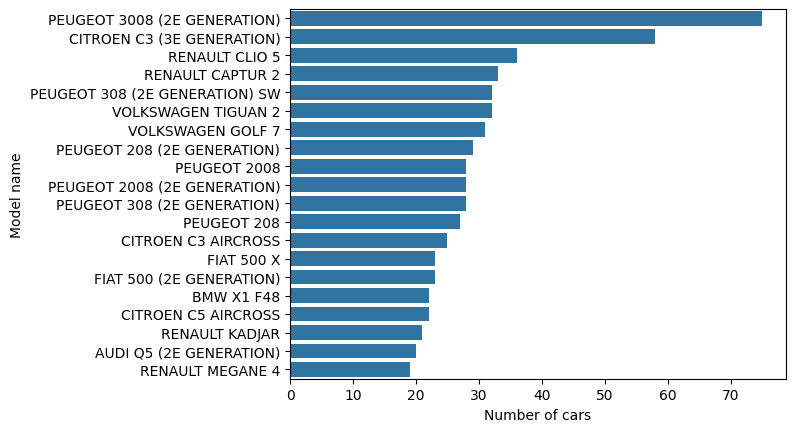

In [ ]:
sns.barplot(y='carmodel', x='count', data=df['carmodel'].str.strip().value_counts().reset_index().head(20));
plt.xlabel('Number of cars')
plt.ylabel('Model name');


Well, quite a lot of models, but a few of data. Let's try to aggregate by car brand to make our categories more voluminous.

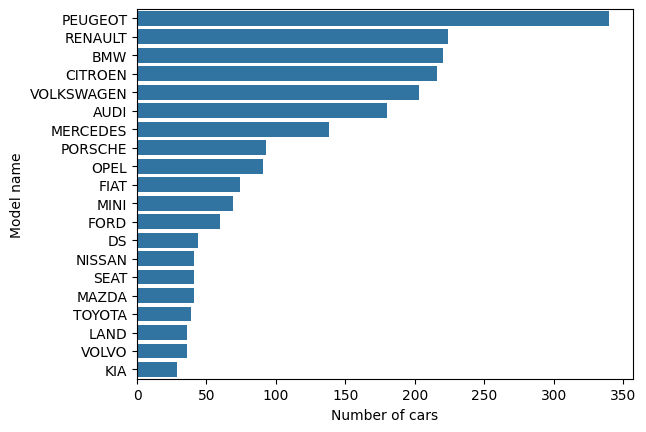

In [ ]:
sns.barplot(y='carmodel', x='count', data=df['carmodel'].str.strip().str.split().str[0].value_counts().reset_index().head(20));
plt.xlabel('Number of cars')
plt.ylabel('Model name');


That's better! And now I know that the french love peugeot :)

In [ ]:
df['carmodel'] = df['carmodel'].str.strip().str.split().str[0]

### Price

Let's plot histogram of our target vector `Price`

In [ ]:
df['price'] = df['price'].str.strip().str.extract(r'([0-9 ]+)')[0].str.replace(' ', '').astype('int')

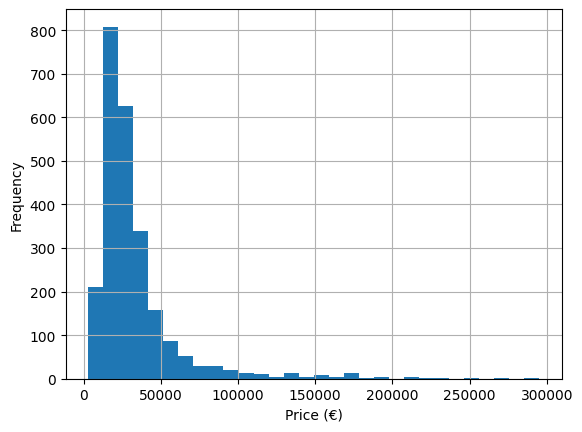

In [ ]:
df['price'].hist(bins=30);
plt.xlabel('Price (€)')
plt.ylabel('Frequency');

Hm, looks like exponential distribution.

### Year of registration

In [ ]:
df = df[~df['année'].isna()]
df.loc[:, ('année')] = df['année'].astype('int')
df = df.rename({'année': 'year'}, axis=1)

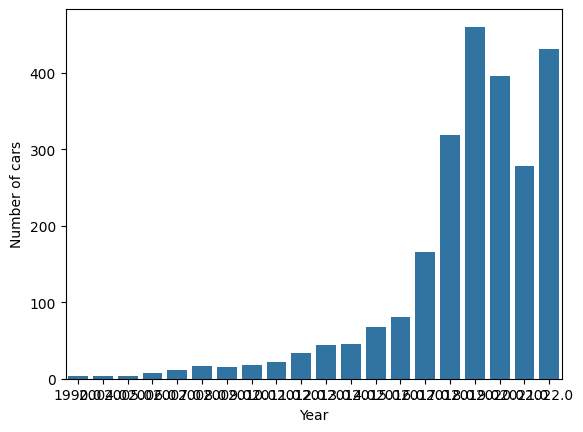

In [ ]:
sns.barplot(x='year', y='count', data=df['year'].value_counts().reset_index().head(20));
plt.xlabel('Year')
plt.ylabel('Number of cars');


Wow, so many relatively new cars! In Belarus situation is diametrically opposite :)

### Does car require a technical check

In [ ]:
df['technical_check'] = df['contrôletechnique'].str.strip() == 'requis'

### Kilometrage

In [ ]:
df['kilometrage'] = df['kilométragecompteur'].str.extract(r'([0-9\s]+)')[0].str.replace(' ', '').astype('int')

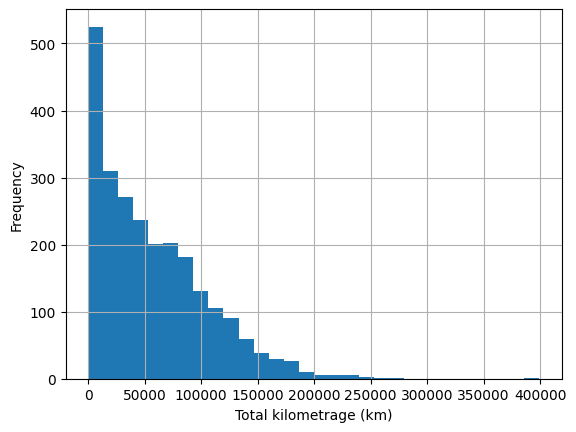

In [ ]:
df['kilometrage'].hist(bins=30)
plt.xlabel('Total kilometrage (km)')
plt.ylabel('Frequency');

Quite a lot of brand new cars!

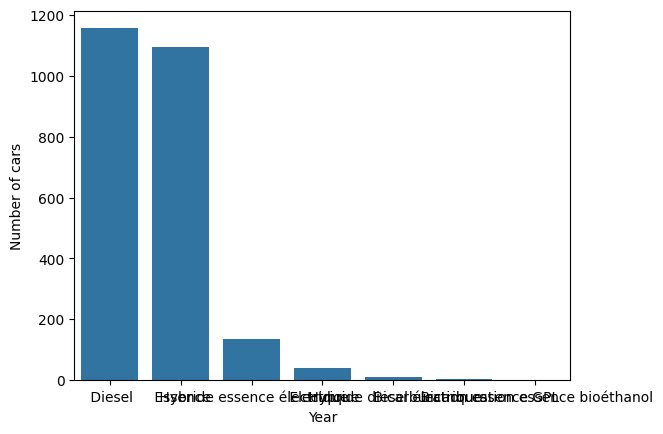

In [ ]:
sns.barplot(x='énergie', y='count', data=df['énergie'].value_counts().reset_index().head(20));
plt.xlabel('Year')
plt.ylabel('Number of cars');

We have some unbalanced classes. Let's just drop them.

In [ ]:
df = df[df['énergie'].str.strip().isin(['Essence', 'Diesel', 'Hybride essence électrique', 'Electrique'])]
df.loc[:, ('car_type')] = df['énergie']

<ipython-input-113-7f32b9acdb70>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Manual/Automatic transmission

In [ ]:
df.loc[:, ('transmission')] = df['boîtedevitesse'].str.strip()

### Car color

In [ ]:
df['color'] = df['couleurextérieure'].str.strip().str.lower()

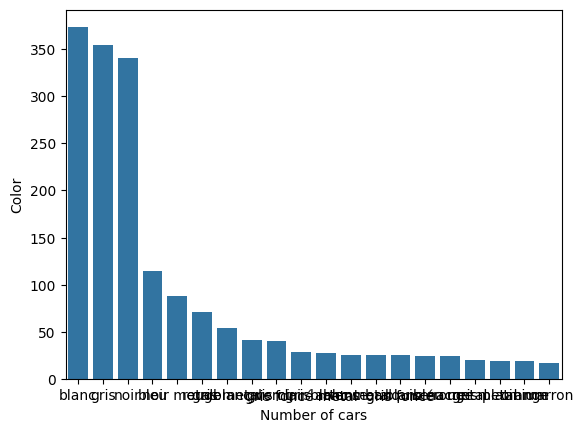

In [ ]:
sns.barplot(x='color', y='count', data=df['color'].value_counts().reset_index().head(20));
plt.xlabel('Number of cars')
plt.ylabel('Color');

I suppose there are a lot of color there, would be great to merge similar ones to bigger category. May be in future I'll do it.

### Number of doors & seats

In [ ]:
df = df[~df['nombredeportes'].isna()]
df['door_number'] = df['nombredeportes'].astype('int')
df['seats_number'] = df['nombredeplaces'].fillna(4).astype('int')

<ipython-input-117-1cd1e5cdf766>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-117-1cd1e5cdf766>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Guaranty

In [ ]:
df['garantie'] = df['garantie'].fillna('0')
df['guaranty'] = df['garantie'].str.extract(r"([0-9]+)")[0].astype("int")

### Is first hand

In [ ]:
df['is_first_hand'] = df['premièremain(déclaratif)'].str.strip() == 'oui'

### Car metrics

In [ ]:
df = df[~df['puissancefiscale'].isna()]
df = df[~df['puissancedin'].isna()]
df['CV'] = df['puissancefiscale'].str.strip().str.extract(r'([0-9]+)')[0].astype('int')
df['car_power'] = df['puissancedin'].str.extract(r"([0-9]+)")[0].astype('int')
df['pollution'] = df["crit'air"].fillna(2).astype('str')

### Options

Would be great to add some features from `options` column. Maybe some NLP techniques would be usefull.

In [ ]:
columns = ['carmodel', 'price', 'year', 'technical_check', 'kilometrage', 'car_type', 'transmission', 'color',
'door_number', 'seats_number', 'guaranty', 'is_first_hand', 'CV', 'car_power', 'pollution']
df = df[columns]

Let's look at correlation matrix.

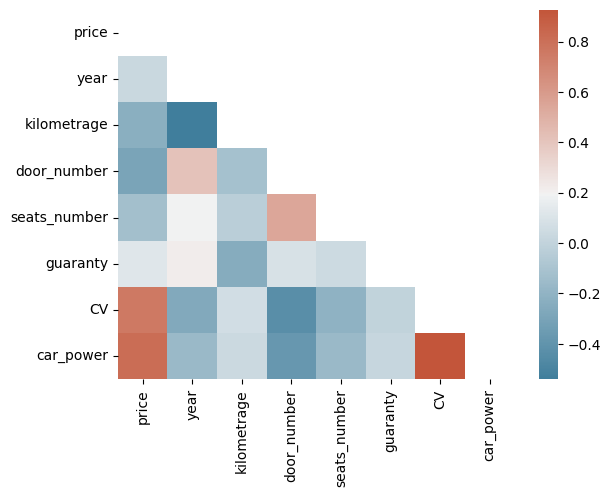

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate correlation matrix
corr = numeric_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Define colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot heatmap
sns.heatmap(corr, mask=mask, cmap=cmap);


## Model building

In [ ]:
y = df['price']
X = df.drop(['price'], axis=1)
numeric_columns = list(X.select_dtypes(include=np.number).columns)
dummies_columns = ["car_type", 'carmodel', 'transmission', 'color', 'pollution']
X = pd.get_dummies(X, columns=dummies_columns, prefix=dummies_columns)

Let's scale our data

In [ ]:
X_full, X_valid, y_full, y_valid = train_test_split(X, y, test_size=0.2, random_state=5432)

scaler = StandardScaler()

X_full.loc[:, numeric_columns] = pd.DataFrame(scaler.fit_transform(X_full[numeric_columns]), columns=numeric_columns, index=X_full.index)
X_valid.loc[:, numeric_columns] = pd.DataFrame(scaler.transform(X_valid[numeric_columns]), columns=numeric_columns, index=X_valid.index)

In [ ]:
import numpy as np
import optuna
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Assuming X_full and y_full are your feature matrix and target vector

# Ensure all data is in numerical format and handle any missing values
X_full = np.nan_to_num(X_full.astype(np.float32))
y_full = np.nan_to_num(y_full.astype(np.float32))

# Reshape input data to have 3D shape (batch_size, timesteps, features)
n_timesteps = 1  # Adjust this based on your data's time steps
X_full_reshaped = X_full.reshape((X_full.shape[0], n_timesteps, X_full.shape[1]))

def objective(trial):
    # Define the hyperparameters to be optimized for RNN
    params = {
        'n_layers': trial.suggest_int('n_layers', 1, 3),
        'n_units': trial.suggest_int('n_units', 32, 128),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-2),
        # Other hyperparameters specific to RNN architecture
    }

    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_full_reshaped, y_full, test_size=0.2, random_state=42)

    # Define the RNN model
    model = tf.keras.Sequential()
    for _ in range(params['n_layers']):
        model.add(LSTM(units=params['n_units'], return_sequences=True, input_shape=(n_timesteps, X_full.shape[1])))  # LSTM layer
    model.add(Dense(1))  # Output layer

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=params['learning_rate']),
                  loss='mean_squared_error')

    # Fit the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, verbose=0)

    # Evaluate model performance
    val_loss = history.history['val_loss'][-1]  # Get the final validation loss

    return val_loss

# Create an Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)


[I 2024-05-12 17:58:20,751] A new study created in memory with name: no-name-03479408-893d-4635-bda0-20abdf8e8b82
[I 2024-05-12 17:58:34,750] Trial 0 finished with value: 1738560384.0 and parameters: {'n_layers': 2, 'n_units': 106, 'learning_rate': 0.006749013612260952}. Best is trial 0 with value: 1738560384.0.
[I 2024-05-12 17:58:54,953] Trial 1 finished with value: 1744009856.0 and parameters: {'n_layers': 2, 'n_units': 111, 'learning_rate': 0.002300128258872447}. Best is trial 0 with value: 1738560384.0.
[I 2024-05-12 17:58:58,897] Trial 2 finished with value: 1746168320.0 and parameters: {'n_layers': 1, 'n_units': 41, 'learning_rate': 0.0026534732689504183}. Best is trial 0 with value: 1738560384.0.
[I 2024-05-12 17:59:10,331] Trial 3 finished with value: 1746967040.0 and parameters: {'n_layers': 3, 'n_units': 126, 'learning_rate': 0.00021593454287661978}. Best is trial 0 with value: 1738560384.0.
[I 2024-05-12 17:59:18,253] Trial 4 finished with value: 1743943296.0 and parameters

In [ ]:
# Optimize the objective function
study.optimize(objective, n_trials=50)

# Display the scores from all trials
print("Scores from all trials:")
for trial in study.trials:
    print(f"Trial {trial.number}: Value = {trial.value}, Params = {trial.params}")


[I 2024-05-12 17:59:36,572] Trial 5 finished with value: 1741012352.0 and parameters: {'n_layers': 2, 'n_units': 63, 'learning_rate': 0.008425332010753208}. Best is trial 0 with value: 1738560384.0.
[I 2024-05-12 17:59:44,672] Trial 6 finished with value: 1747075712.0 and parameters: {'n_layers': 2, 'n_units': 90, 'learning_rate': 0.0003752496227574663}. Best is trial 0 with value: 1738560384.0.
[I 2024-05-12 17:59:50,171] Trial 7 finished with value: 1744269184.0 and parameters: {'n_layers': 1, 'n_units': 40, 'learning_rate': 0.006154190987264017}. Best is trial 0 with value: 1738560384.0.
[I 2024-05-12 17:59:57,349] Trial 8 finished with value: 1743176576.0 and parameters: {'n_layers': 1, 'n_units': 99, 'learning_rate': 0.0029492929313709284}. Best is trial 0 with value: 1738560384.0.
[I 2024-05-12 18:00:01,256] Trial 9 finished with value: 1744779008.0 and parameters: {'n_layers': 1, 'n_units': 64, 'learning_rate': 0.0029903591765142023}. Best is trial 0 with value: 1738560384.0.
[I

Scores from all trials:
Trial 0: Value = 1738560384.0, Params = {'n_layers': 2, 'n_units': 106, 'learning_rate': 0.006749013612260952}
Trial 1: Value = 1744009856.0, Params = {'n_layers': 2, 'n_units': 111, 'learning_rate': 0.002300128258872447}
Trial 2: Value = 1746168320.0, Params = {'n_layers': 1, 'n_units': 41, 'learning_rate': 0.0026534732689504183}
Trial 3: Value = 1746967040.0, Params = {'n_layers': 3, 'n_units': 126, 'learning_rate': 0.00021593454287661978}
Trial 4: Value = 1743943296.0, Params = {'n_layers': 2, 'n_units': 52, 'learning_rate': 0.005513720590019399}
Trial 5: Value = 1741012352.0, Params = {'n_layers': 2, 'n_units': 63, 'learning_rate': 0.008425332010753208}
Trial 6: Value = 1747075712.0, Params = {'n_layers': 2, 'n_units': 90, 'learning_rate': 0.0003752496227574663}
Trial 7: Value = 1744269184.0, Params = {'n_layers': 1, 'n_units': 40, 'learning_rate': 0.006154190987264017}
Trial 8: Value = 1743176576.0, Params = {'n_layers': 1, 'n_units': 99, 'learning_rate': 0

In [ ]:
# interactively visualizes the hyperparameters and scores
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
# parameter interactions on an interactive chart.
optuna.visualization.plot_contour(study, params=['reg_alpha','reg_lambda','colsample_bytree'])

In [ ]:
# Visualize parameter importances.
optuna.visualization.plot_param_importances(study)

In [ ]:
# Visualize empirical distribution function
optuna.visualization.plot_edf(study)

## Model Performance

### Let's check how our model generalises validation data!

In [ ]:
params = study.best_params
xgb_model = XGBRegressor(n_jobs=-1)
xgb_model.set_params(**params)
xgb_model.fit(X_full, y_full)
y_pred = xgb_model.predict(X_valid)
print(f"RMSE = {np.sqrt(mean_squared_error(y_pred, y_valid))}")

RMSE = 7487.3574084188185


### Feature importance

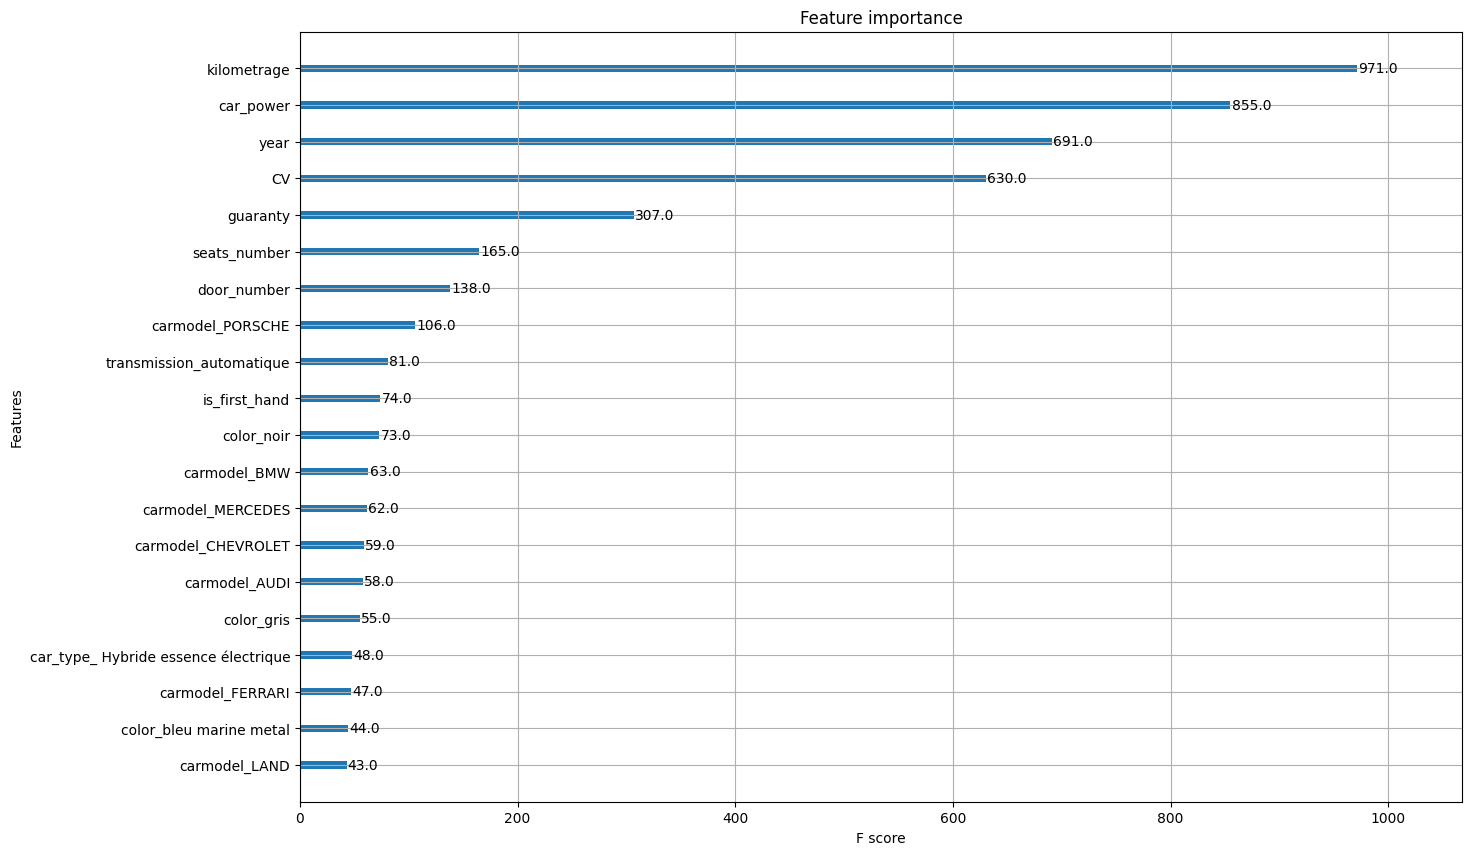

In [ ]:
f, ax = plt.subplots(figsize=(15, 10))
plot_importance(xgb_model, max_num_features=20, ax=ax);